### Data preparation and Set Up

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab
usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


## Downloading New York Dataset

In [19]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import json

import urllib.request
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json'
filename = 'new_york.json'
urllib.request.urlretrieve(url, filename)

#!wget -q -O 'newyork_data.json' print('Data downloaded!')

('new_york.json', <http.client.HTTPMessage at 0x28f601201c0>)

In [21]:
with open('new_york.json') as json_data:
    newyork_data = json.load(json_data)

In [22]:
neighborhoods_data = newyork_data['features']

In [23]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [24]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [25]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [26]:
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       306 non-null    object 
 1   Neighborhood  306 non-null    object 
 2   Latitude      306 non-null    float64
 3   Longitude     306 non-null    float64
dtypes: float64(2), object(2)
memory usage: 9.7+ KB


In [27]:
neighborhoods.to_csv("newyork.csv",index=False)

## Downloading Toronto Dataset

In [28]:
## Importing modules

from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv

In [29]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text 
soup = BeautifulSoup(source, 'lxml')

In [30]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)


In [31]:
coordinates=pd.read_csv("Geospatial_Coordinates.csv")

In [32]:
df=pd.merge(df,coordinates,how="left" ,left_on="PostalCode",right_on="Postal Code")
df.drop(df.columns[[3]], axis = 1, inplace = True)
df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [33]:
df.to_csv("Toronto.csv",index=False)

## Data Exploration

In [41]:
## Loading visualization Libraries
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import plotly.graph_objects as go
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
cf.go_offline()

In [42]:
# Setting notebook colours
# Defining colour schemes to be used in the notebook for plotly plots
notebook_colours=["plum","slateblue","navy","firebrick",
                                      "darksalmon","slateblue","maroon","lightskyblue","blue","darkmagenta"]

In [38]:
TR=df
NYC=neighborhoods

In [39]:
TR.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [40]:
NYC.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


### Toronto Exploration

In [48]:
# For categorical variables
iplot(cf.subplots([TR['Borough'].figure(kind='hist',color=notebook_colours[0]),
                   TR['PostalCode'].figure(kind='hist',color=notebook_colours[1]),
                   TR['Neighborhood'].figure(kind='hist',color=notebook_colours[8])],shape=(1,3)))

In [47]:
iplot(cf.subplots([TR['Latitude'].figure(kind='hist',color=notebook_colours[8]),
                   TR['Longitude'].figure(kind='hist',color=notebook_colours[6])],shape=(2,1)))

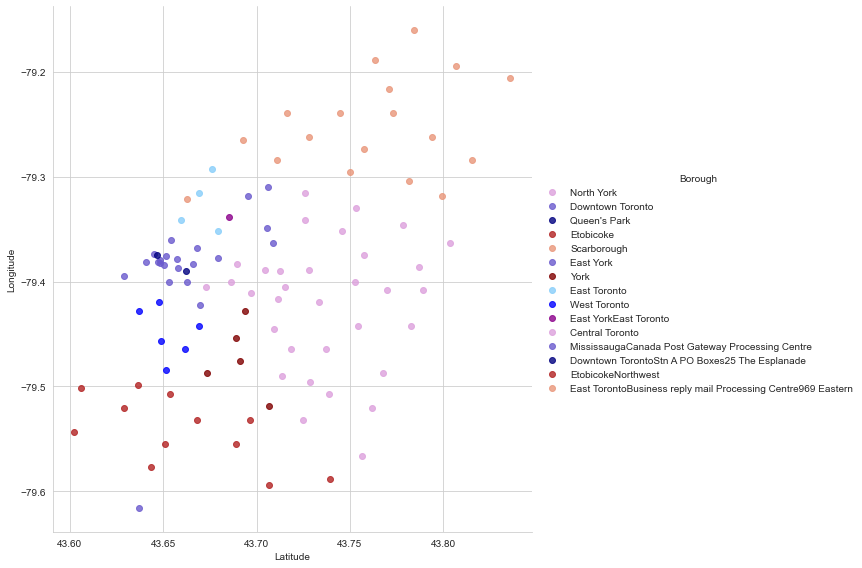

In [53]:
sns.set_style("whitegrid")
sns.lmplot(x='Latitude',y='Longitude',data=TR,hue='Borough',palette=notebook_colours,fit_reg=False,height=8)

In [95]:
locations = TR[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
len(locationlist)

103

In [99]:
TR_map = folium.Map(location=[TR.iloc[0,3], TR.iloc[0,4]], zoom_start=10)

for point in range(0, len(locationlist)):
    folium.CircleMarker(locationlist[point],radius=2, popup=TR['Neighborhood'][point],color=notebook_colours[2]).add_to(TR_map)
TR_map

### NYC Exploration

In [83]:
# For categorical variables
iplot(cf.subplots([NYC['Borough'].figure(kind='hist',color=notebook_colours[0]),
                   NYC['Neighborhood'].figure(kind='hist',color=notebook_colours[8])],shape=(1,2)))

In [84]:
iplot(cf.subplots([NYC['Latitude'].figure(kind='hist',color=notebook_colours[8]),
                   NYC['Longitude'].figure(kind='hist',color=notebook_colours[6])],shape=(2,1)))

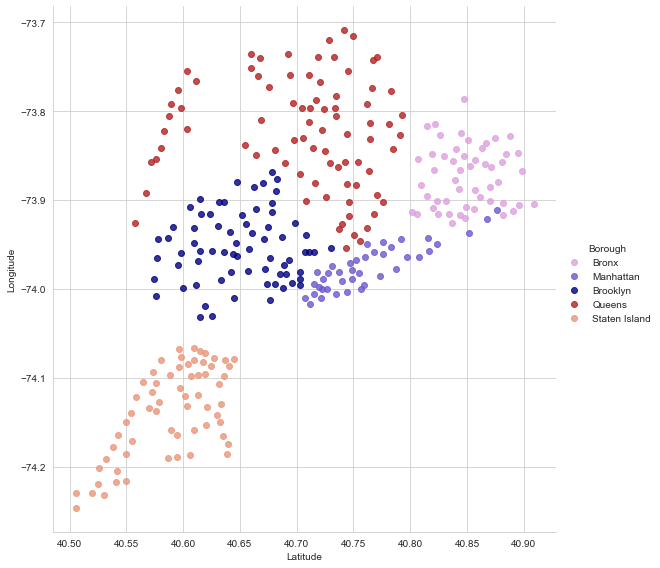

In [85]:
sns.set_style("whitegrid")
sns.lmplot(x='Latitude',y='Longitude',data=NYC,hue='Borough',palette=notebook_colours,fit_reg=False,height=8)

In [100]:
nyc_locations = NYC[['Latitude', 'Longitude']]
nyc_locationlist = nyc_locations.values.tolist()
len(nyc_locationlist)

306

In [102]:
NYC_map = folium.Map(location=[NYC.iloc[0,2], NYC.iloc[0,3]], zoom_start=10)
for point in range(0, len(nyc_locationlist)):
    folium.CircleMarker(nyc_locationlist[point],radius=2,color=notebook_colours[5] ,popup=NYC['Neighborhood'][point],icon='').add_to(NYC_map)
NYC_map

## K-Means for clustering neighborhoods

<b> Clustering neighborhoods in Toronto </b>

In [139]:
# Standardizing Coordinatres before clustering
from sklearn.preprocessing import StandardScaler

TR_coordinates=TR[['Latitude','Longitude']]
#TR_coordinates=StandardScaler().fit_transform(TR_coordinates)

In [149]:
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist

In [153]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(TR_coordinates) 
    kmeanModel.fit(TR_coordinates)     
      
    distortions.append(sum(np.min(cdist(TR_coordinates, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / TR_coordinates.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(TR_coordinates, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / TR_coordinates.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

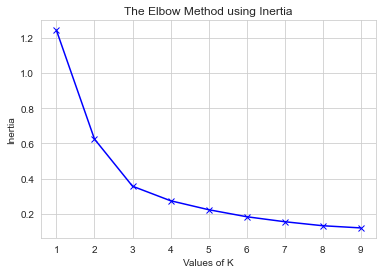

In [155]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

From the above elbow plot for inertia, 6 is identified as the optimal number of clusters for neighborhoods in Toronto.

In [181]:
kmeanModel = KMeans(n_clusters=6).fit(TR_coordinates) 
kmeanModel.fit(TR_coordinates)     
print(sum(np.min(cdist(TR_coordinates, kmeanModel.cluster_centers_,'euclidean'),axis=1)) / TR_coordinates.shape[0]) 
print((kmeanModel.inertia_)) 
mapping1[k] = sum(np.min(cdist(TR_coordinates, kmeanModel.cluster_centers_, 
              'euclidean'),axis=1)) / TR_coordinates.shape[0] 
mapping2[k] = kmeanModel.inertia_ 

0.03747174276602313
0.18479392108785275


In [182]:
TR['cluster_label']=kmeanModel.labels_
TR.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,cluster_label
0,M3A,North York,Parkwoods,43.753259,-79.329656,1
1,M4A,North York,Victoria Village,43.725882,-79.315572,1
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,3
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,2
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,3


In [214]:
TR['cluster_label'].value_counts()

3    28
2    19
1    18
5    13
0    13
4    12
Name: cluster_label, dtype: int64

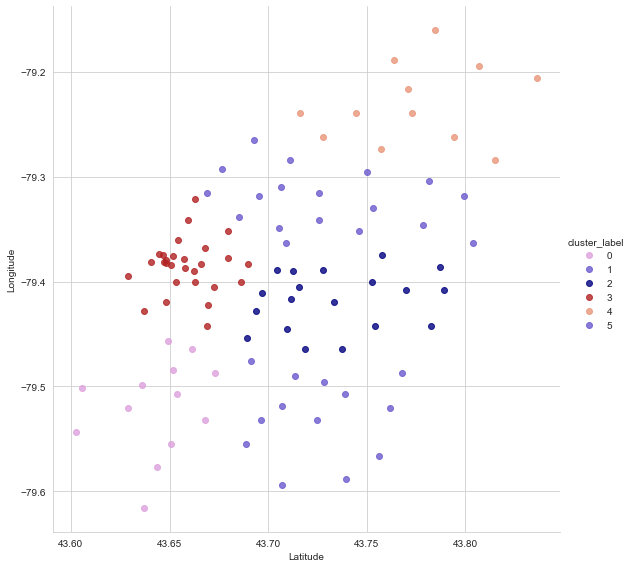

In [217]:
sns.set_style("whitegrid")
sns.lmplot(x='Latitude',y='Longitude',data=TR,hue='cluster_label',palette=notebook_colours,fit_reg=False,height=8)

<b> Clustering neighborhoods in New York </b>

In [165]:
# Standardizing Coordinatres before clustering
from sklearn.preprocessing import StandardScaler

NYC_coordinates=NYC[['Latitude','Longitude']]
#TR_coordinates=StandardScaler().fit_transform(TR_coordinates)

In [166]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(NYC_coordinates) 
    kmeanModel.fit(NYC_coordinates)     
      
    distortions.append(sum(np.min(cdist(NYC_coordinates, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / NYC_coordinates.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(NYC_coordinates, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / NYC_coordinates.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

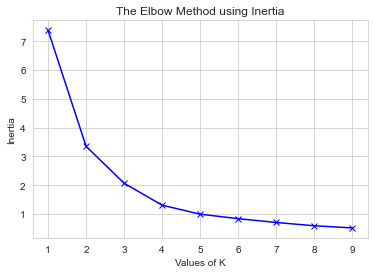

In [167]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

From the above elbow plot for inertia, 6 is identified as the optimal number of clusters for neighborhoods in New York City also.

In [168]:
kmeanModel = KMeans(n_clusters=6).fit(NYC_coordinates) 
kmeanModel.fit(NYC_coordinates)     
print(sum(np.min(cdist(NYC_coordinates, kmeanModel.cluster_centers_,'euclidean'),axis=1)) / NYC_coordinates.shape[0]) 
print((kmeanModel.inertia_)) 
mapping1[k] = sum(np.min(cdist(NYC_coordinates, kmeanModel.cluster_centers_, 
              'euclidean'),axis=1)) / NYC_coordinates.shape[0] 
mapping2[k] = kmeanModel.inertia_ 

0.04697749320629982
0.8385563928644659


In [179]:
NYC['cluster_label']=kmeanModel.labels_

In [213]:
NYC['cluster_label'].value_counts()

4    68
2    64
0    57
5    51
3    44
1    22
Name: cluster_label, dtype: int64

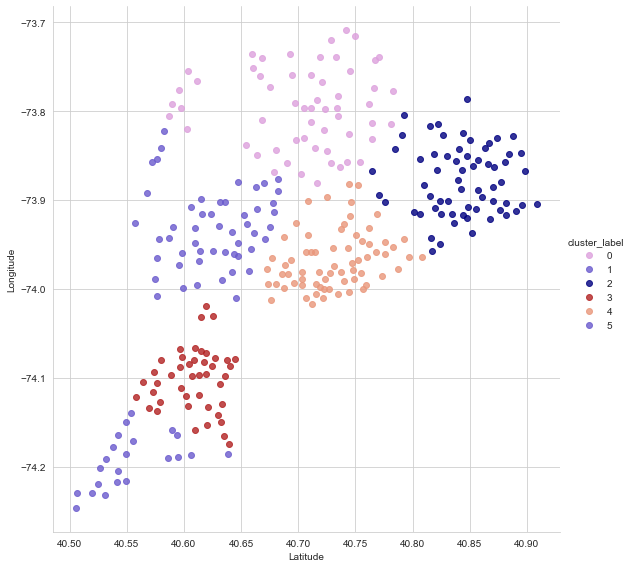

In [226]:
sns.set_style("whitegrid")
sns.lmplot(x='Latitude',y='Longitude',data=NYC,hue='cluster_label',palette=notebook_colours,fit_reg=False,height=8)

Six homogeneous clusters of neighborhoods are formed as found earlier while visualizing latitude and longtiude.

### Understanding locations with neighborhood clusters
<b> Exploring locations near the largest cluster centers with Foursquare API </b>

#### Toronto
Largest cluster: Cluster 3 with 28 neighborhoods


#### NYC
Largest cluster: Cluster 4 with 68 neighborhoods



In [257]:
toronto_clusters=TR.groupby('cluster_label',as_index=False).mean()
toronto_clusters

,cluster_label,Latitude,Longitude
0,0,43.643186,-79.518773
1,1,43.728617,-79.322454
2,2,43.733906,-79.417894
3,3,43.658630,-79.385329
4,4,43.774241,-79.230540
5,5,43.724718,-79.527911


In [230]:
nyc_clusters=NYC.groupby('cluster_label',as_index=False).mean()
nyc_clusters

,cluster_label,Latitude,Longitude
0,0,40.703598,-73.795858
1,1,40.553360,-74.193430
2,2,40.843067,-73.877752
3,3,40.608716,-74.101899
4,4,40.731068,-73.967148
5,5,40.625204,-73.931543


<b> Exploring cluster 4 in NYC </b>

In [231]:
CLIENT_ID = '5DTMXS5FFESVGWE2EVSE35M55PQWAMPKKWJASVL0TCY0UYVG' # your Foursquare ID
CLIENT_SECRET = 'UQN5NTZBFD3HCICKWSWOFX5HKCUANLVQ20TS4J4KK111GL30' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5DTMXS5FFESVGWE2EVSE35M55PQWAMPKKWJASVL0TCY0UYVG
CLIENT_SECRET:UQN5NTZBFD3HCICKWSWOFX5HKCUANLVQ20TS4J4KK111GL30


In [280]:
neighborhood_latitude,neighborhood_longitude=nyc_clusters.iloc[0,1:3] 
LIMIT = 100
radius = 500
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL
results = requests.get(url).json()

In [281]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [282]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-282-561c05f0fdd1>:3: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



,name,categories,lat,lng
0,Margherita Pizza,Pizza Place,40.704662,-73.796860
1,Blink Fitness,Gym,40.704466,-73.796610
2,Jamaican Flavors,Caribbean Restaurant,40.705592,-73.794951
3,Don Nico's,Mexican Restaurant,40.705134,-73.799258
4,Chase Bank,Bank,40.704031,-73.797936


In [283]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

48 venues were returned by Foursquare.


In [284]:
nearby_venues.categories.value_counts()

Mobile Phone Shop        3
Sandwich Place           3
Clothing Store           3
Pizza Place              3
Fried Chicken Joint      2
Storage Facility         2
Coffee Shop              2
Department Store         2
Donut Shop               2
Mexican Restaurant       2
Caribbean Restaurant     2
Kids Store               1
Laundromat               1
Ice Cream Shop           1
Multiplex                1
Performing Arts Venue    1
Shoe Store               1
Gym                      1
Supplement Shop          1
Bank                     1
American Restaurant      1
Chinese Restaurant       1
Discount Store           1
Music Store              1
Gym / Fitness Center     1
Hardware Store           1
Concert Hall             1
Park                     1
Intersection             1
Japanese Restaurant      1
Pharmacy                 1
Men's Store              1
Bus Station              1
Name: categories, dtype: int64

<b> Exploring cluster 3 in Toronto </b>

In [258]:
neighborhood_latitude,neighborhood_longitude=toronto_clusters.iloc[3,1:3] 

In [259]:
LIMIT = 100
radius = 500
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=5DTMXS5FFESVGWE2EVSE35M55PQWAMPKKWJASVL0TCY0UYVG&client_secret=UQN5NTZBFD3HCICKWSWOFX5HKCUANLVQ20TS4J4KK111GL30&v=20180605&ll=43.65863029285715,-79.38532917142858&radius=500&limit=100'

In [260]:
results = requests.get(url).json()

In [261]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [262]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-262-561c05f0fdd1>:3: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



,name,categories,lat,lng
0,Hailed Coffee,Coffee Shop,43.658833,-79.383684
1,Jimmy's Coffee,Coffee Shop,43.658421,-79.385613
2,The Queen and Beaver Public House,Gastropub,43.657472,-79.383524
3,NEO COFFEE BAR,Coffee Shop,43.660130,-79.385830
4,College Park Area,Park,43.659453,-79.383785


In [263]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

83 venues were returned by Foursquare.


In [265]:
nearby_venues.categories.value_counts()

Coffee Shop                   14
Burger Joint                   3
Bubble Tea Shop                3
Sandwich Place                 3
Hotel                          3
Sushi Restaurant               3
Italian Restaurant             3
Movie Theater                  2
Department Store               2
Salad Place                    2
Thai Restaurant                2
Restaurant                     2
Falafel Restaurant             2
Tea Room                       1
Chinese Restaurant             1
Gastropub                      1
Deli / Bodega                  1
Breakfast Spot                 1
Mexican Restaurant             1
Juice Bar                      1
Clothing Store                 1
Bookstore                      1
Fast Food Restaurant           1
Poke Place                     1
Indian Restaurant              1
Portuguese Restaurant          1
Art Museum                     1
Art Gallery                    1
Wine Bar                       1
Pharmacy                       1
Discount S